# 6.Decision Trees
If you have experienced those customer feedback phone calls where they try to know the user rating based on the buttons pressed, then decision tree is not new for you. Decision Tree is like Sherlock Trying to figure out the right questions to segregate data into unmixed sets. 
Let us say, I want to seperate roses from hibiscus using a question. I have two possible questions,  
```
a) Is the color of the flower red ?  
b) Number of Petals > 5
```
If I have 5 flowers I might have some hibiscus with red color, which means choosing question 'a' would be a poor tie-breaker.  To choose a question, we use measure called Entropy

# Understanding Entropy
Entropy is measure of uncertainity in a probability distribution. It is given by 
$$ E(P) = -\sum p(c_i)log(p(c_i)) $$

#### Experiment 1 : Find out the Entropy of Heads/Tails in a coin tossing Experiment

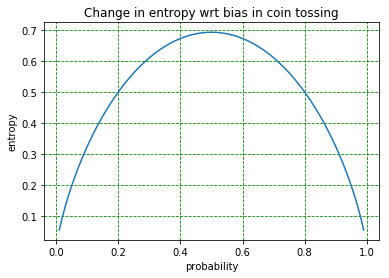

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plst = np.linspace(0.01,0.99,99)
entropy = []

for p in plst:
    entropy.append(-1*p*np.log(p)-1*(1-p)*np.log(1-p) )

plt.plot(plst,entropy)
plt.xlabel('probability')
plt.ylabel('entropy')
plt.title('Change in entropy wrt bias in coin tossing')
plt.grid(True,which='both',color='g',linestyle='--')

#### Experiment 2 : Plot of -log(p) (Cross Entropy) and its derivative

Text(0,0.5,'|gradient of cross entropy|')

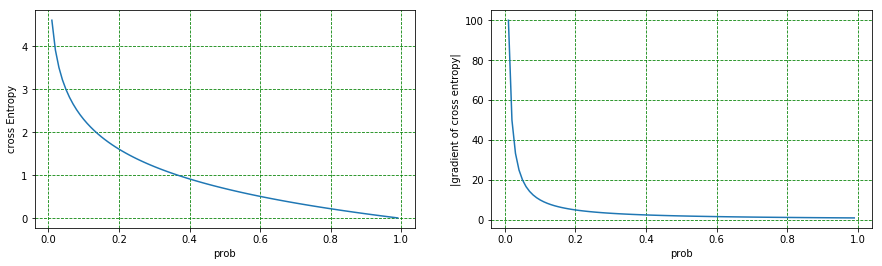

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plst = np.linspace(0.01,0.99,99)
crossentropy,dbydp = [],[]

for p in plst:
    crossentropy.append(-1*np.log(p) )
    dbydp.append(1/p )

    
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
ax[0].plot(plst,crossentropy)
ax[0].grid(b=True, which='both',color='g',linestyle='--')
ax[0].set_xlabel('prob')
ax[0].set_ylabel('cross Entropy')

ax[1].plot(plst,dbydp)
ax[1].grid(b=True, which='both',color='g',linestyle='--')
ax[1].set_xlabel('prob')
ax[1].set_ylabel('|gradient of cross entropy|')




## Gini's Impurity
**Gini impurity** is a measure of how often **a randomly chosen element from the set** would be **incorrectly labeled**, if it was randomly labeled according to the distribution of labels in the subset. 

It is given by $$I_G(x) = \underbrace{\sum p_i}_{\text{selecting element}} \underbrace{\left( \sum\limits_{i\neq j } pj\right)}_{\text{miscassification for class i}}  $$  
$$I_G(x) = (1-\sum p_{i}^2)$$

#### Experiment 3 : Understanding Gini's Impurity


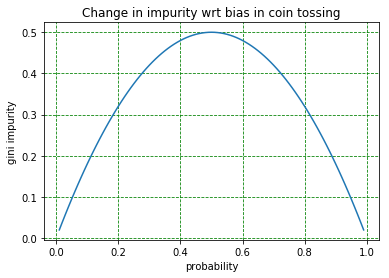

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plst = np.linspace(0.01,0.99,99)
impurity = []

for p in plst:
    impurity.append(1- p*p -(1-p)*(1-p) )

plt.plot(plst,impurity)
plt.xlabel('probability')
plt.ylabel('gini impurity')
plt.title('Change in impurity wrt bias in coin tossing')
plt.grid(True,which='both',color='g',linestyle='--')

## Information Gain
Information gain is a measure of decrease in entropy given a new piece of Information. 
![](img/DecisionTreeInfoGain-01.jpg)

#### Experiment 4 : Understanding Information Gain


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

play_data = pd.read_csv('data/tennis.csv.txt')

In [49]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


![decisionTree](img/decisionTree2-01.jpg)

In [114]:
play_data1 = play_data[['outlook','play']]
play_data1['play'] = play_data1['play'].map(lambda x : 1 if x=='yes' else 0) 
divided = play_data1.groupby('outlook').agg(['count','mean'])
divided.columns = divided.columns.droplevel()
divided

C:\Users\jaley\Anaconda3\envs\condaenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,mean
outlook,,
overcast,4,1.0
rainy,5,0.6
sunny,5,0.4


In [119]:

together = play_data1.groupby(lambda x: True).agg(['count','mean'])
together.columns = together.columns.droplevel()
together

,count,mean
True,14,0.642857


**Definition :** Original Entropy - weighted sum of entropy of new subclasses, where weight is nothing but based on number of elements in the subclass.  
Information gain for the above example is given by  
$$ \underbrace{-0.64log(0.64)-0.36log(0.36)}_{\text{original entropy}} - \left( -\underbrace{\frac{4}{14}}_{\text{node weight}}(1log1+0log0)-\frac{5}{14}(0.6log0.6+0.4log0.4)-\frac{5}{14}(0.4log0.4+0.6log0.6) \right) $$

In [132]:
divided = divided.rename({'count':'count','mean':'p_play'},axis='columns')

In [133]:
divided['self entropy'] = -divided['p_play']*np.log(divided['p_play'])-(1-divided['p_play'])*np.log(1-divided['p_play'])
divided.fillna(0,inplace=True)

C:\Users\jaley\Anaconda3\envs\condaenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [134]:
divided

,count,p_play,self entropy
outlook,,,
overcast,4,1.0,0.000000
rainy,5,0.6,0.673012
sunny,5,0.4,0.673012


In [121]:
together = together.rename({'count':'count','mean':'p_play'},axis='columns')

In [122]:
together.columns

Index(['count', 'p_play'], dtype='object')

In [123]:
together['self entropy'] = -together['p_play']*np.log(together['p_play'])-(1-together['p_play'])*np.log(1-together['p_play'])

In [124]:
together

,count,p_play,self entropy
True,14,0.642857,0.651757


In [148]:
conditional_entropy=0
entropy=together['self entropy']
total = together['count']
for elem in divided.T.to_dict().values():
    p = elem['p_play']
    count= elem['count']
    if p<0.001 or p>0.999: 
        group_entropy=0
    else :
        print (p)
        group_entropy = -p*np.log(p)-(1-p)*np.log(1-p)
    conditional_entropy+=(count/total)*group_entropy

0.6
0.4


In [152]:
information_gain = entropy - conditional_entropy
print ('Original entropy : %2.3f'%entropy)
print ('Conditional entropy : %2.3f'%conditional_entropy)
print ('Information Gain : %2.3f'%information_gain)


Original entropy : 0.652
Conditional entropy : 0.481
Information Gain : 0.171
